In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
class mlp(torch.nn.Module):  #definimos la clase multilinear perceptron
    def __init__(self,isize,hsize,osize):         # _ es como el this en java (suele usarse self
        super().__init__()
        self.L1=torch.nn.Linear(isize,hsize)         # isize,hsize,osize son los tamaños del input hiden y output
        self.L2=torch.nn.Linear(hsize,osize)   #defino los parametros de L1 y L2 dentro de la clase
                                              
    def forward(self,x):                   #aca defino como obtener una respuesta de la red
        h=torch.tanh(self.L1(x))
        y=torch.tanh(self.L2(h))
        return y

In [3]:
P=100
N=8              #Seria el equivalente al caso de 8 bits
H=N+1           #Para ver que onda cambiamos un poco la dimension de la capa oculta
H=int(N+9*N/4)    #Si me paso de rosca con el H entonces va a empezar a memorizar 
M=1              #Una sola capa

x=torch.randn(P,N).sign()         #Generamos 1 y -1 al azar
z=torch.prod(x,dim=1).view(P,M)    #Esta orientado en la coordenada 1, y especificamos que es de Px1
                  #Con prod estoy multiplicando todos los elementos de cada fila y lo pongo en un vector columna
    
bs=10                                   #Numero de datos en cada miniBatch    
lr=1e-2                                 #Learning rate

E,t=1.0,0                              #Condiciones iniciales


E_list = list()                      #Creo listas para graficar el error
t_list =list()

E_list.append(E)
t_list.append(t)


E_eval = list()                      #Creo listas para graficar el error
t_eval =list()

E_eval.append(E)
t_eval.append(t)

In [4]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Usa la Gpu solo si esta disponiible

In [5]:
model=mlp(N,H,M).to(device)         #Usa device para hacer calculos relacionados al modelo
                                    #Hay que tener cuidado ya que "moverlos" a device lleva tiempo
                                     #Tambien hay que mover los parametros del modelo
costf=torch.nn.MSELoss()

In [6]:
print(model)

mlp(
  (L1): Linear(in_features=8, out_features=26, bias=True)
  (L2): Linear(in_features=26, out_features=1, bias=True)
)


In [7]:
optim=torch.optim.SGD(model.parameters(),lr=0.1)   #Seteo como hacer la optimización

optim.setp()  Me actualiza los valores, tambien puedo setear los gradientes a cero con omptim.zero_grad()

In [8]:
xp=torch.randn(P,N).sign()         #Generamos 1 y -1 al azar
zp=torch.prod(x,dim=1).view(P,M)    #Esta orientado en la coordenada 1, y especificamos que es de Px1
model.train()     #esto hace que los calculos sean hechos como si estuviera entrenando
while E>1E-3 and t<1000:
    y=model(x)                              #Esto me devuelve el resultado de la red    
    
    optim.zero_grad()                #El reseteo de los gradientes va antes del error.backward
    
    error=costf(y,z)                #De esta forma se calcula el error del modelo        

    error.backward()       #hace la retropropagacion y calcula el error
    
    optim.step()
    
    model.eval()      #Con esto hago los calculos segun la evaluacion
    with torch.no_grad():
        yp=model(xp)
        Ep=costf(yp,zp)
    
    E_list.append(E)    
    t_list.append(t)
    E_eval.append(Ep)
    t_eval.append(t)
    E=error.item()     #Esto me devuelve el error escalar  Esta promediado
    t+=1
    if t%100==0:
        print(t,E)
print(t,E)

100 0.832394540309906
200 0.4680417478084564
300 0.17743967473506927
400 0.07552658021450043
500 0.0394713319838047
600 0.02429164946079254
700 0.016711153090000153
800 0.012393631041049957
900 0.009685996919870377
1000 0.007862736470997334
1000 0.007862736470997334


In [9]:
print("El error luego de entrenar es: ",Ep)

El error luego de entrenar es:  tensor(1.9841)


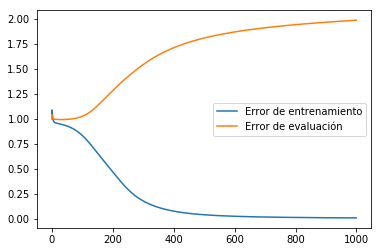

In [10]:
plt.figure()
plt.plot(t_list,E_list,label="Error de entrenamiento")
plt.plot(t_eval,E_eval,label="Error de evaluación")
plt.legend()
plt.show()

# Train vs Eval
Dropout= simula que entrena varios modelos en simultaneo (apaga algunas neuronas),
Hay cosas que estan activadas durante el entrenamiento y que no queremos que esten en la evaluacion del modelo